
# Students Exam Scores Analysis

---
### Introduction
In this project, I comprehensively analysed student results using Python. The aim was to understand the performance trends and derive meaningful insights from the data.
### Objective: 
The primary objective was to analyze student results to identify patterns, trends, and areas for improvement. This involved cleaning, exploring, and visualizing the data to make informed decisions.
### Tools Used:
    Python, Pandas, Matplotlib, Seaborn.

### Steps Involved
1. **Data Collection**:
   - Importing necessary libraries.
   - Loading the dataset into a Pandas DataFrame.

2. **Data Cleaning**:
   - Handling missing values.
   - Removing duplicates.
   - Correcting data types.

3. **Data Exploration**:
   - Descriptive statistics.
   - Data visualization (histograms, box plots, scatter plots).
   - Identifying patterns and correlations.

4. **Data Transformation**:
   - Feature engineering.
   - Normalization and scaling.

5. **Data Visualization**:
   - Creating visualizations to summarize findings.
   - Using Matplotlib and Seaborn for plots.

### Conclusion
Through this project, I uncovered key insights and patterns within the student results dataset. These findings can guide further analysis and decision-making processes. This project not only enhanced my data analysis skills but also demonstrated my ability to handle real-world data challenges effectively.

---
### **Dataset Source**
    https://www.kaggle.com/datasets/desalegngeb/students-exam-scores/data
---
### **About Dataset**
This dataset includes scores from three test scores of students at a (fictional) public school and a variety of personal and socio-economic factors that may interact with them.

---
### **Remark/warning/disclaimer:**

- This datasets are fictional and should be used for educational purposes only.
- The original dataset generator creator is Mr. Royce Kimmons
- There are similar datasets on kaggle already but this one is different and arguably better in two ways.
    - 1) has more data (>30k instead of just the 1k the other datasets have),
    - 2) has extended datasets with more features (15 instead of 9) and has missing values which makes it ideal for data cleaning and data preprocessing.

---
### Data Dictionary (column description)
 1. **Gender:** Gender of the student (male/female)
 2. **EthnicGroup:** Ethnic group of the student (group A to E)
 3. **ParentEduc:** Parent(s) education background (from some_highschool to master's degree)
 4. **LunchType:** School lunch type (standard or free/reduced)
 5. **TestPrep:** Test preparation course followed (completed or none)
 6. **ParentMaritalStatus:** Parent(s) marital status (married/single/widowed/divorced)
 7. **PracticeSport:** How often the student parctice sport (never/sometimes/regularly))
 8. **IsFirstChild:** If the child is first child in the family or not (yes/no)
 9. **NrSiblings:** Number of siblings the student has (0 to 7)
 10. **TransportMeans:** Means of transport to school (schoolbus/private)
 11. **WklyStudyHours:** Weekly self-study hours(less that 5hrs; between 5 and 10hrs; more than 10hrs)
 12. **MathScore:** math test score(0-100)
 13. **ReadingScore:** reading test score(0-100)
 14. **WritingScore:** writing test score(0-100)

---
### Analytics questions:
 1. What factors (features) affect test scores most?
 2. Are there interacting features which affect test scores?

---

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv("E:\\Data_Analyst\\Projects\\Expanded_data_with_more_features.csv")
print(df.head())

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

In [21]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [25]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [27]:
# Drop unnamed column
df = df.drop("Unnamed: 0", axis = 1)

In [29]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [31]:
unique_values = df["WklyStudyHours"].unique()
for i in unique_values:
    print(i)

# print(*unique_values, sep='\n')
# df["WklyStudyHours"] = df["WklyStudyHours"].str.replace("05-Oct","5-10")

< 5
5 - 10
> 10
nan


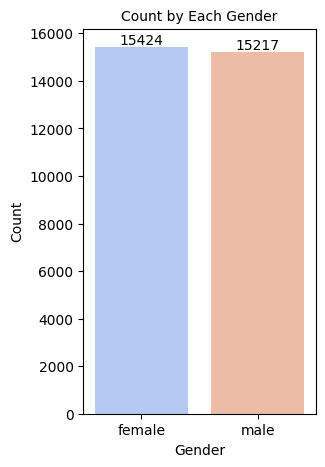

In [33]:
# Gender distribution

plt.figure(figsize=(3, 5))

# Plotting the count plot with hue and legend set to False
ax = sns.countplot(data=df, x="Gender", hue="Gender", palette="coolwarm")

# Add labels to the bars
for containers in ax.containers:
    ax.bar_label(containers)
# ax.bar_label(ax.containers[0])

# Add axis labels and title
ax.set_xlabel("Gender")
ax.set_ylabel("Count")
ax.set_title("Count by Each Gender", fontsize=10)

plt.show()


### The chart displays the count of individuals by gender, with females (15,424) slightly outnumbering males (15,217). This translates to females making up approximately 50.3% and males 49.7% of the dataset means there are 0.6% more females than males, highlighting a fairly balanced gender distribution.

In [35]:
gb = df.groupby("ParentEduc").agg({"MathScore":'mean', "ReadingScore":'mean', "WritingScore":'mean'}).round(2)
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree      68.37         71.12         70.30
bachelor's degree       70.47         73.06         73.33
high school             64.44         67.21         65.42
master's degree         72.34         75.83         76.36
some college            66.39         69.18         68.50
some high school        62.58         65.51         63.63


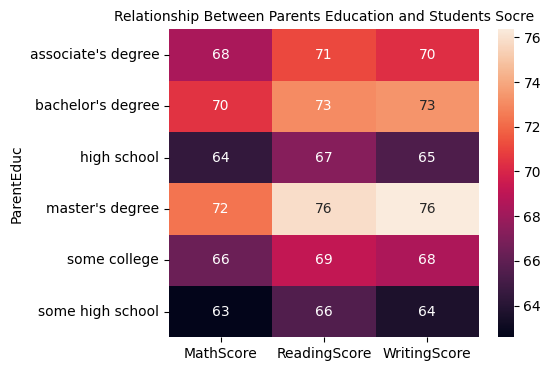

In [91]:
# Parents education impact on students Score
plt.figure(figsize=(5, 4))

# Plotting the heat plot
sns.heatmap(data=gb, annot = True)

plt.title("Relationship Between Parents Education and Students Socre", fontsize = 10)

plt.show()


**Students whose parents have a master's degree achieve the highest mean scores of 76 across all subjects, while those whose parents completed only some high school education have the lowest mean scores of 64.** 

**This represents a 12-point gap (approximately 18.75%) in average performance, emphasizing a positive correlation between higher parental education and student achievement.**

In [61]:
gb1 = df.groupby("ParentMaritalStatus").agg({"MathScore":'mean', "ReadingScore":'mean', "WritingScore":'mean'}).round(2)
print(gb1)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced                 66.69         69.66         68.80
married                  66.66         69.39         68.42
single                   66.17         69.16         68.17
widowed                  67.37         69.65         68.56


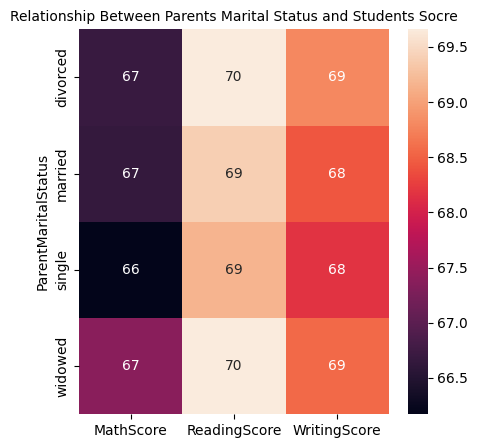

In [93]:
# Parents education impact on students Score
plt.figure(figsize=(5, 5))

# Plotting the heat plot
sns.heatmap(data=gb1, annot = True)

plt.title("Relationship Between Parents Marital Status and Students Socre", fontsize = 10)

plt.show()


**Students with widowed or divorced parents score slightly higher on average (67–70 across subjects) compared to those with single or married parents, whose scores range from 66 to 69, reflecting a maximum difference of 1–2 points (approximately 1.5%).**

### **Parental education** 
shows a **stronger impact**, with students of highly educated parents scoring up to 12 points higher (18.75%) compared to those with less education, 

**while**
### **Parental marital status** 
has a **minimal effect**, with a maximum score difference of only 1–2 points (1.5%) across groups.

count    30641.00
mean        66.56
std         15.36
min          0.00
25%         56.00
50%         67.00
75%         78.00
max        100.00
Name: MathScore, dtype: float64


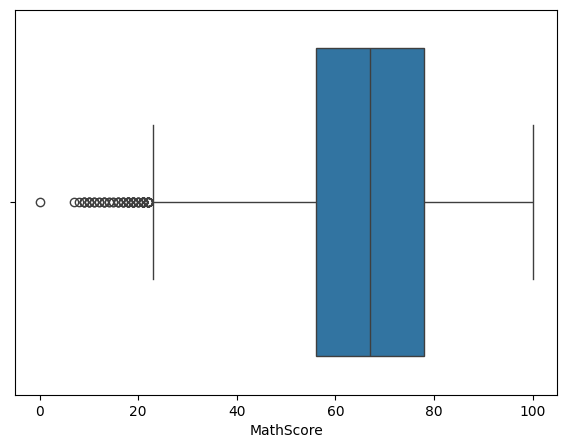

In [111]:
plt.figure(figsize=(7, 5))

sns.boxplot(data = df, x = "MathScore")

plt.show

print(df["MathScore"].describe().round(2))

count    30641.00
mean        69.38
std         14.76
min         10.00
25%         59.00
50%         70.00
75%         80.00
max        100.00
Name: ReadingScore, dtype: float64


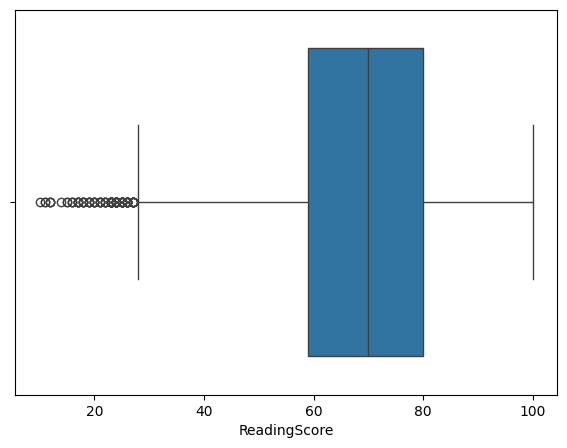

In [115]:
plt.figure(figsize=(7, 5))

sns.boxplot(data = df, x = "ReadingScore")

plt.show

print(df["ReadingScore"].describe().round(2))

count    30641.00
mean        68.42
std         15.44
min          4.00
25%         58.00
50%         69.00
75%         79.00
max        100.00
Name: WritingScore, dtype: float64


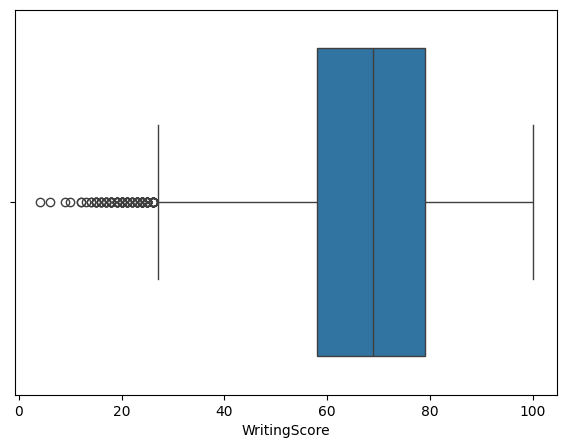

In [119]:
plt.figure(figsize=(7, 5))

sns.boxplot(data = df, x = "WritingScore")

plt.show

print(df["WritingScore"].describe().round(2))

In [125]:
print(*df["EthnicGroup"].unique(), sep = '\n')

nan
group C
group B
group A
group D
group E


[2219, 5826, 9212, 7503, 4041]


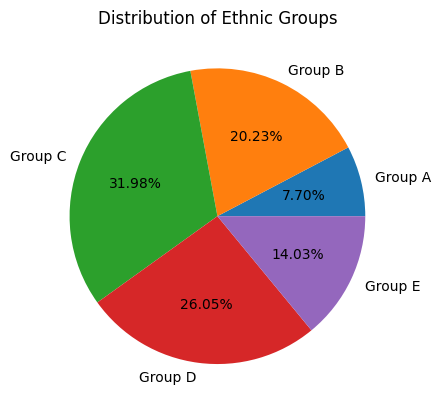

In [195]:
# Distribution of ethnic group
groupA = df.loc[(df["EthnicGroup"] == "group A")].count()
groupB = df.loc[(df["EthnicGroup"] == "group B")].count()
groupC = df.loc[(df["EthnicGroup"] == "group C")].count()
groupD = df.loc[(df["EthnicGroup"] == "group D")].count()
groupE = df.loc[(df["EthnicGroup"] == "group E")].count()

glabels = ['Group A', 'Group B', 'Group C', 'Group D', 'Group E']

groups = [groupA["EthnicGroup"], groupB["EthnicGroup"], groupC["EthnicGroup"], groupD["EthnicGroup"], groupE["EthnicGroup"]]
#print(groups)

plt.pie(groups, labels = glabels, autopct = "%1.2f%%")

plt.title("Distribution of Ethnic Groups")

plt.show()

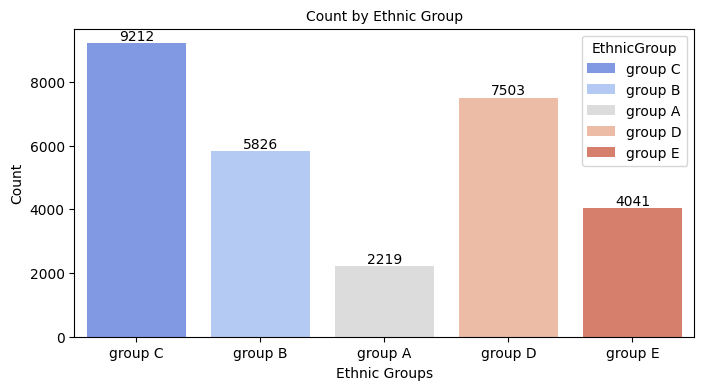

In [197]:
# Gender distribution

plt.figure(figsize=(8, 4))

# Plotting the count plot with hue and legend set to False
ax = sns.countplot(data=df, x="EthnicGroup", hue="EthnicGroup", palette="coolwarm")

# Add labels to the bars
for containers in ax.containers:
    ax.bar_label(containers)
# ax.bar_label(ax.containers[0])

# Add axis labels and title
ax.set_xlabel("Ethnic Groups")
ax.set_ylabel("Count")
ax.set_title("Count by Ethnic Group", fontsize=10)

plt.show()

In [37]:
 df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
